In [1]:
#Initialize modules
import csv
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
#Get csv's into DataFrame


airCsv1 = 'Data/2017_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'
airCsv2 = 'Data/2016_AirTravel_T100D_MARKET_ALL_CARRIER.csv'
airCsv3 = 'data/2015_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'

df_airtravel1 = pd.read_csv(airCsv1)
df_airtravel2 = pd.read_csv(airCsv2)
df_airtravel3 = pd.read_csv(airCsv3)
df_population.head()

,Geographical_Location,Census_2010,Census_2010_Est_Base,2010,2011,2012,2013,2014,2015,2016
0,United States,"308,745,538","308,758,105","309,348,193","311,663,358","313,998,379","316,204,908","318,563,456","320,896,618","323,127,513"
1,Northeast,"55,317,240","55,318,353","55,388,056","55,632,766","55,829,059","55,988,771","56,116,791","56,184,737","56,209,510"
2,Midwest,"66,927,001","66,929,825","66,978,602","67,153,331","67,332,320","67,543,948","67,726,368","67,838,387","67,941,429"
3,South,"114,555,744","114,563,005","114,863,114","116,061,801","117,299,171","118,424,320","119,696,311","121,039,206","122,319,574"
4,West,"71,945,553","71,946,922","72,118,421","72,815,460","73,537,829","74,247,869","75,023,986","75,834,288","76,657,000"


In [3]:
df_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,WEEK
0,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/1/2015,NaN,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/2/2015,NaN,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/3/2015,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/4/2015,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/5/2015,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_air = df_airtravel1
df_air = df_air.append(df_airtravel2)
df_air = df_air.append(df_airtravel3)
len(df_air)

54769

In [14]:
df_air.head()


,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,YEAR,MONTH,Unnamed: 19
0,0.0,80.0,5X,19917.0,United Parcel Service,10257,1025702,30257,ALB,"Albany, NY",NY,10529,1052904,30529,BDL,"Hartford, CT",CT,2015,4,NaN
1,0.0,120.0,5X,19917.0,United Parcel Service,10257,1025702,30257,ALB,"Albany, NY",NY,15096,1509602,35096,SYR,"Syracuse, NY",NY,2015,4,NaN
2,0.0,80.0,5X,19917.0,United Parcel Service,10529,1052904,30529,BDL,"Hartford, CT",CT,10257,1025702,30257,ALB,"Albany, NY",NY,2015,4,NaN
3,0.0,279.0,5X,19917.0,United Parcel Service,10792,1079204,30792,BUF,"Buffalo, NY",NY,14100,1410002,34100,PHL,"Philadelphia, PA",PA,2015,4,NaN
4,0.0,494.0,5X,19917.0,United Parcel Service,10792,1079204,30792,BUF,"Buffalo, NY",NY,14730,1473003,33044,SDF,"Louisville, KY",KY,2015,4,NaN


In [16]:
df_air_ny = df_air.loc[df_air['DEST_STATE_ABR']=='NY']
len(df_air_ny)
df_air15_16 = df_air_ny.loc[(df_air_ny["YEAR"]==2015) | (df_air_ny["YEAR"]==2016), :]
df_air15_16.head(100)

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,YEAR,MONTH,Unnamed: 19
0,0.0,163.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",10540,1054003,30540,BED,"Bedford, MA",MA,11764,1176402,31764,FRG,"East Farmingdale, NY",NY,2016,1,NaN
1,0.0,249.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",10540,1054003,30540,BED,"Bedford, MA",MA,15096,1509602,35096,SYR,"Syracuse, NY",NY,2016,1,NaN
4,0.0,891.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11123,1112301,31123,CPS,"St. Louis, MO",MO,12197,1219702,31703,HPN,"White Plains, NY",NY,2016,1,NaN
5,0.0,1330.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11259,1125903,30194,DAL,"Dallas, TX",TX,15096,1509602,35096,SYR,"Syracuse, NY",NY,2016,1,NaN
8,0.0,476.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",12348,1234802,32348,INT,"Winston-Salem, NC",NC,10792,1079204,30792,BUF,"Buffalo, NY",NY,2016,1,NaN
9,0.0,1118.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,1330303,32467,MIA,"Miami, FL",FL,12197,1219702,31703,HPN,"White Plains, NY",NY,2016,1,NaN
10,0.0,1217.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,1330303,32467,MIA,"Miami, FL",FL,15096,1509602,35096,SYR,"Syracuse, NY",NY,2016,1,NaN
12,0.0,215.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",15096,1509602,35096,SYR,"Syracuse, NY",NY,11764,1176402,31764,FRG,"East Farmingdale, NY",NY,2016,1,NaN
14,0.0,223.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",15096,1509602,35096,SYR,"Syracuse, NY",NY,12391,1239102,31703,ISP,"Islip, NY",NY,2016,1,NaN
16,0.0,24.0,0WQ,21352.0,Avjet Corporation,15167,1516702,35167,TEB,"Teterboro, NJ",NJ,12197,1219702,31703,HPN,"White Plains, NY",NY,2016,1,NaN


In [27]:
df_air_ny_grp = df_air15_16[['YEAR','MONTH','PASSENGERS','DISTANCE','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR']]

df_air_ny_grp.head()

,YEAR,MONTH,PASSENGERS,DISTANCE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR
0,2016,1,0.0,163.0,BED,"Bedford, MA",MA,FRG,"East Farmingdale, NY",NY
1,2016,1,0.0,249.0,BED,"Bedford, MA",MA,SYR,"Syracuse, NY",NY
4,2016,1,0.0,891.0,CPS,"St. Louis, MO",MO,HPN,"White Plains, NY",NY
5,2016,1,0.0,1330.0,DAL,"Dallas, TX",TX,SYR,"Syracuse, NY",NY
8,2016,1,0.0,476.0,INT,"Winston-Salem, NC",NC,BUF,"Buffalo, NY",NY


In [28]:
df_air_ny_grp = df_air_ny_grp.groupby(['YEAR','MONTH'])
df_air_summary = pd.DataFrame(df_air_ny_grp[['PASSENGERS','DISTANCE']].sum())
df_air_summary = df_air_summary.reset_index()
df_air_summary.sort_values(by=['YEAR','MONTH'],ascending=True)
df_air_summary.head(100)

,YEAR,MONTH,PASSENGERS,DISTANCE
0,2015,1,2356155.0,792359.0
1,2015,2,2267675.0,752947.0
2,2015,3,2899704.0,801939.0
3,2015,4,2988061.0,803414.0
4,2015,5,3097146.0,760320.0
5,2015,6,3021198.0,769464.0
6,2015,7,3168423.0,739151.0
7,2015,8,3223309.0,789212.0
8,2015,9,2820088.0,730353.0
9,2015,10,2994272.0,732786.0


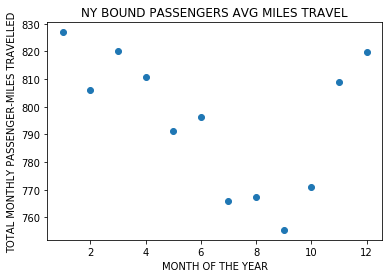

In [9]:
plt.scatter(df_air_summary['MONTH'],df_air_summary['DISTANCE'])
plt.xlabel('MONTH OF THE YEAR')
plt.ylabel('TOTAL MONTHLY PASSENGER-MILES TRAVELLED')
plt.title('NY BOUND PASSENGERS AVG MILES TRAVEL')
plt.show()